# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Daniel Enrique Brambila Rico   <br>
Url: https://github.com/pachon00/03MAIR-Algoritmos-de-optimizacion/tree/master/Seminario <br>
Problema:
> 1. Elección de grupos de población homogéneos <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

- Una productora ganadera nos encarga la tarea de seleccionar grupos de terneros para aplicar 3 tratamientos diferentes. Para cada uno de los tratamientos debemos seleccionar 3 grupos de terneros que sean lo mas homogéneos posible en peso para que en los resultados del tratamiento influya lo menos posible el peso del animal. 
- Disponemos de una población de N animales entre machos y hembras • Se solicita diseñar un algoritmo para conseguir una agrupación que cumpla de la mejor manera posible las especificaciones de la productora
- Aun se desconocen los datos concretos de los animales por lo que debemos trabajar con datos que debemos generar de forma aleatoria. Lo que si nos proporcionan es una plantilla de los datos:
- Hemos podido averigua que el peso medio del ternero es 37kg con una desviación estándar de 2.1

(*) La respuesta es obligatoria


(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




__Respuesta 1__

_Para determinar la cantidad de posibilidades disponibles para este problema es necesario contar el tamaño que asignaremos a cada uno de los grupos de k elementos de una población N.

_Siempre se generarán 3 grupos en donde el primer animal es N-1, el segundo N-2 y así continua hasta completar el tamaño k del grupo.

N! / k! (N-k)!


__Respuesta 2__

_Tomando en cuenta que la población tiene un peso promedio de 37Kg y una desviación estándar de 2.1 
_La principal restricción que nos afectara es el sexo de los animales ya que los grupos deben ser disjuntos. Y si asumimos que la población será 50-50 la cantidad de hembras = NH cantidad de manchos = NM grupos posibles = GP = 9!
Las posibilidades totales son: (( NH! / (NH -k)! ) * 9! ) + ( ( NM! / (NM -k)! ) * 9! )



Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

___Estructura___
La estructura que se utilizara para abordar el problema es:

Se generara un diccionario que utilizara como clave "grupo, tratamiento"
    *Los tratamientos están definidos como "A", "B" y "C"
    *los grupos se definen de acuerdo a la cantidad de terneros que deben formar 9 grupos causando el menor desperdicio posible.
    *Cada clave del diccionario contendrá una lista en la cual serán almacenados diccionarios que continen "id, peso" de cada ternero agregado al conjunto.

___Diseño___
Si bien la resolución del problema puede ser dada mediante fuerza bruta con un algoritmo voraz con regreso, la cantidad de permutaciones es muy alta y pueden existir múltiples soluciones por lo que yo optaría por una solución Meta heurística.

Al requerir generar distintas combinatorias y posteriormente conservar las mejores optare por utilizar el Recocido Simulado.
* Se requiere generar diversos grupos de soluciones factibles
* Se busca minimizar la desviación estándar
* La distribución de probabilidad de los datos es uno de los parámetros para este algoritmo y al tener una distribución normal esto representa una certeza de que con forme se avance en el tiempo se encontraran mejores resultados.


Algoritmos de búsqueda
Utilizando la técnica de ramificación y poda podremos explorar las soluciones de manera exhaustiva  y de este modo seleccionar los grupos que minimicen nuestra función objetivo (en este caso homogeneizar el peso).


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta
f(y) = x + y = 0

Donde mientras la sumatoria de x(media) más y(desviación) tiendan a 0  el acierto aumentara.

Minimización de la desviación estándar y media del peso en grupos de animales, al integrar las dos variables en una función de acierto se buscará maximizar el acierto.


Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [1109]:
import math
import random 
import numpy as np
import scipy.stats as st
import pandas as pd

mu, sigma, N = 37, 1.2, 100

# mean and standard deviation
s = np.random.normal(mu, sigma, 500)
abs(sigma - np.std(s, ddof=1)) < 1.2
ID =  [i for i in range(N)]
ANIMALES = [( range(0,N),np.random.normal(mu, sigma, N), ['M' if random.randint(0, 1) else 'H' for p in range(0, N)])]

ANIMALES_DIC = {
    'ID': ID,
    'WEIGTH': np.random.normal(mu, sigma, N),
    'SEXO': ['M' if random.randint(0, 1) else 'H' for p in range(0, N)]
}
data = pd.DataFrame(ANIMALES_DIC)

In [1110]:
data_hembras = data[data["SEXO"] == "H"]
data_machos = data[data["SEXO"] == "M"]

In [1111]:
sizeOfGroupH = data_hembras["ID"].count() // 9
sizeOfGroupM = data_machos["ID"].count() // 9
print("cantidad de animales que se pueden completar de hembras: " + str(sizeOfGroupH))
print("cantidad de animales que se pueden completar de machos: " + str(sizeOfGroupM))

cantidad de animales que se pueden completar de hembras: 5
cantidad de animales que se pueden completar de machos: 5


In [1234]:
def calcula_acierto(a,data):
    gMean = np.mean(data)
    gMax = np.max(data)
    med = abs(gMean-np.mean(a))/gMax
    desvA = np.std(a)
    acierto = 1 - (desvA + med)
    return acierto*100

#a = [35, 37, 36.81577361560864, 36.282106226906095, 37.28059470812348]
a=[37.295650355551906, 37.28910712692943, 36.81577361560864, 36.282106226906095, 37.28059470812348]
calcula_acierto(a,data_machos['WEIGTH'])

59.96545790050563

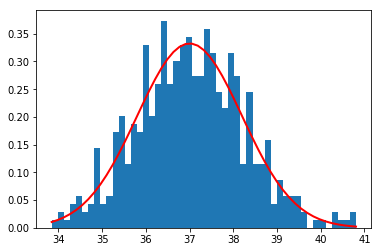

In [1222]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 50, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [1113]:
tratamiento = ["A", "B", "C"]
grupos = [1,2,3]
dic_grupos = dict()
a=[]

j=0
for i in grupos:
    for t in tratamiento:
       a.append((i,t))
       print("indice "+str(j) +" Grupo: "+ str(i)+ " Tratamiento: " +str(t) +" ")
       dic_grupos[a[j]] = list([[]])
       j+=1  

indice 0 Grupo: 1 Tratamiento: A 
indice 1 Grupo: 1 Tratamiento: B 
indice 2 Grupo: 1 Tratamiento: C 
indice 3 Grupo: 2 Tratamiento: A 
indice 4 Grupo: 2 Tratamiento: B 
indice 5 Grupo: 2 Tratamiento: C 
indice 6 Grupo: 3 Tratamiento: A 
indice 7 Grupo: 3 Tratamiento: B 
indice 8 Grupo: 3 Tratamiento: C 


In [1286]:
import copy as c

ids= []
weigths=[]
grupo_test=[ids,weigths]
resultados = []


def agrega_ternero(idx2,L):
    grupo_test[1].append(L.iloc[idx2]['WEIGTH'])
    grupo_test[0].append(L.iloc[idx2]['ID'])

def calcula_acierto(a,Gmean,Gmax):
    med = abs(Gmean-np.mean(a))/Gmax
    desvA = np.std(a)
    acierto = 100 - (desvA + med)
    return acierto

def arma_combinaciones(L,Gmean,Gmax):
    mejor_combinacion=[999,40,555,40,222]
    peso_init=9999
    acum=0
    for idx in range(len(L)):
        for idx2 in range(idx+1,len(L)):
            if len(grupo_test[0]) == 0:
                acum=0
                agrega_ternero(idx,L)
                acum += L.iloc[idx]['WEIGTH']
            if len(grupo_test[0]) < sizeOfGroupH:
                agrega_ternero(idx2,L)
                acum += L.iloc[idx2]['WEIGTH']
            else:
                if calcula_acierto(grupo_test[0],Gmean,Gmax) > calcula_acierto(mejor_combinacion,Gmean,Gmax):
                    mejor_combinacion = grupo_test.copy()
                    grupo_test[0].clear()
                    grupo_test[1].clear()
                    peso_init = acum
    
    return mejor_combinacion

def forma_grupos(L):
    k=0
    gMean = np.mean(L['WEIGTH'])
    gMax = np.max(L['WEIGTH'])
    for i in dic_grupos:
        dic_grupos[i] = c.deepcopy((arma_combinaciones(L,gMean,gMax)))
        print(dic_grupos[i])
        print('Acierto ' + str(calcula_acierto(dic_grupos[i][1],gMean,gMax)))
        L = L.drop(dic_grupos[i][0][0])
        k+=1
    return 0


In [1287]:
data_hembras = data[data["SEXO"] == "H"]
data_machos = data[data["SEXO"] == "M"]

sizeOfGroupH = data_hembras["ID"].count() // 9
sizeOfGroupM = data_machos["ID"].count() // 9
print("cantidad de animales que se pueden completar de hembras: " + str(sizeOfGroupH))
print("cantidad de animales que se pueden completar de machos: " + str(sizeOfGroupM))

print('\nMachos\n')
res = forma_grupos(data_machos)
print('\nHembras\n')
res2 = forma_grupos(data_hembras)


cantidad de animales que se pueden completar de hembras: 5
cantidad de animales que se pueden completar de machos: 5

Machos

[[2, 25, 27, 29, 30], [35.295650355551906, 36.10078774860924, 38.32885153089908, 39.22529195658598, 37.29727476364766]]
Acierto 98.56548486145559
[[3, 29, 30, 32, 33], [37.79239665788847, 39.22529195658598, 37.29727476364766, 36.165708621661395, 36.9865331101901]]
Acierto 98.97374981936157
[[4, 30, 32, 33, 34], [40.67701420055017, 37.29727476364766, 36.165708621661395, 36.9865331101901, 37.44553915961832]]
Acierto 98.43684436826024
[[5, 32, 33, 34, 37], [36.1857125988163, 36.165708621661395, 36.9865331101901, 37.44553915961832, 36.936447129377626]]
Acierto 99.49641886645198
[[6, 33, 34, 37, 39], [36.87631871121993, 36.9865331101901, 37.44553915961832, 36.936447129377626, 36.68375662805823]]
Acierto 99.74737704002241
[[7, 27, 29, 30, 32], [39.817378061787814, 38.32885153089908, 39.22529195658598, 37.29727476364766, 36.165708621661395]]
Acierto 98.6578978190257
[[

Calcula la complejidad del algoritmo por fuerza bruta

n(n-1)!
A esta complejidad habría que sumar la de c.deepcopy ya que esta función realiza una copia recursiva de los objetos dentro de la lista.
n(n-1)!*n

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [1297]:

import random
from math import e

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
    solucion = [Nodos.iloc[0]]
    for i in range(sizeOfGroupH-1):
        solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
    return solucion 

def calcula_acierto(a,Gmean,Gmax):
    med = abs(Gmean-np.mean(a))/Gmax
    desvA = np.std(a)
    acierto = 100 - (desvA + med)
    return acierto

def genera_vecina_aleatorio(solucion,universe):
    i = random.choice(range(1, len(solucion)) )
    j = random.choice( list(set(universe)-set(solucion)) )
    vecina = solucion.copy()
    vecina[i] = universe[j]
    return vecina

def probabilidad(T,d):
    r=random.random();
    if(r <= (e**(-1*d)/(T*1.0))):
        return True
    else:
        return False

def bajar_temperatura(T):
    return T-1

def recocido_simulado(problem, TEMPERATURA,gMean,gMax):
    mejor_solucion = []
    mejor_acierto =0

    solution = crear_solucion(problem['ID'])
    #problem['WEIGTH'][solution].sum()
    ac_ini = calcula_acierto(problem['WEIGTH'][solution],gMean,gMax)
    
    while TEMPERATURA > 0:    
        vecAleatory = genera_vecina_aleatorio(solution,problem['ID'])
        ac_vec = calcula_acierto(problem['WEIGTH'][vecAleatory],gMean,gMax)

        #Si es la mejor solución de todas se guarda
        if ac_vec > mejor_acierto:
            mejor_solucion = vecAleatory
            mejor_acierto = ac_vec
    
        #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
        if ac_vec > ac_ini or probabilidad(TEMPERATURA, abs(ac_ini - ac_vec) ) :
            solution = vecAleatory
            ac_ini = ac_vec

        TEMPERATURA = bajar_temperatura(TEMPERATURA)
    
    print("La mejor solución encontrada es " , end="")
    print(mejor_solucion)
    print("con una acierto total de " , end="")
    print(mejor_acierto)
    return mejor_solucion   

def lanza_rec(L,temperatura):
    gMean = np.mean(L['WEIGTH'])
    gMax = np.max(L['WEIGTH'])
    for i in dic_grupos:
        dic_grupos[i] = c.deepcopy(recocido_simulado(L,temperatura,gMean,gMax))
        L = L.drop(dic_grupos[i])

sol = recocido_simulado(data_machos, 1000, 37.01, 40.67)

La mejor solución encontrada es [2, 67, 83, 80, 14]
con una acierto total de 99.70593087359651


(*)Calcula la complejidad del algoritmo 

Respuesta

La complejidad del algoritmo es Log(n) ya que aunque cambie la población del grupo, siempre tendremos que disminuir la temperatura mediante un número de iteraciones.


Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [0]:
import math
import random 
import numpy as np
import scipy.stats as st
import pandas as pd

mu, sigma, N = 37, 1.2, 100

# mean and standard deviation
s = np.random.normal(mu, sigma, 500)
abs(sigma - np.std(s, ddof=1)) < 1.2
ID =  [i for i in range(N)]
ANIMALES = [( range(0,N),np.random.normal(mu, sigma, N), ['M' if random.randint(0, 1) else 'H' for p in range(0, N)])]

ANIMALES_DIC = {
    'ID': ID,
    'WEIGTH': np.random.normal(mu, sigma, N),
    'SEXO': ['M' if random.randint(0, 1) else 'H' for p in range(0, N)]
}
data = pd.DataFrame(ANIMALES_DIC)

Aplica el algoritmo al juego de datos generado

Respuesta

In [1298]:
data_hembras = data[data["SEXO"] == "H"]
data_machos = data[data["SEXO"] == "M"]

sizeOfGroupH = data_hembras["ID"].count() // 9
sizeOfGroupM = data_machos["ID"].count() // 9
print("cantidad de animales que se pueden completar de hembras: " + str(sizeOfGroupH))
print("cantidad de animales que se pueden completar de machos: " + str(sizeOfGroupM))

print('\n Machos \n')
lanza_rec(data_machos,1000)
print('\n Hembras \n')
lanza_rec(data_hembras,1000)

cantidad de animales que se pueden completar de hembras: 5
cantidad de animales que se pueden completar de machos: 5

 Machos 

La mejor solución encontrada es [2, 67, 14, 83, 80]
con una acierto total de 99.70570929139714
La mejor solución encontrada es [3, 78, 93, 34, 10]
con una acierto total de 99.84698924622779
La mejor solución encontrada es [4, 65, 77, 7, 29]
con una acierto total de 99.37882779686572
La mejor solución encontrada es [5, 25, 41, 32, 91]
con una acierto total de 99.94175452251149
La mejor solución encontrada es [6, 73, 87, 58, 37]
con una acierto total de 99.97176947340135
La mejor solución encontrada es [8, 96, 86, 18, 90]
con una acierto total de 98.83497763484213
La mejor solución encontrada es [11, 98, 13, 62, 33]
con una acierto total de 99.94069769882017
La mejor solución encontrada es [15, 30, 68, 19, 88]
con una acierto total de 99.97733918407579
La mejor solución encontrada es [17, 97, 43, 22, 55]
con una acierto total de 99.47249565217068

 Hembras 

La 

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta
https://es.wikipedia.org/wiki/Coeficiente_binomial

Trabajo con diccionarios y listas
https://www.datacamp.com/community/tutorials/18-most-common-python-list-questions-learn-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=278443377092&utm_targetid=aud-299261629574:dsa-473406583195&utm_loc_interest_ms=&utm_loc_physical_ms=9050729&gclid=CjwKCAiAiJPkBRAuEiwAEDXZZbsKKknvVbylBZe3GOEyx-VQn06o8mJ7Q0keLWrB5ACPnIc05BGKcxoCZXAQAvD_BwE#question5

https://docs.python.org/2/library/copy.html


Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Una manera de continuar avanzando con la resolución de este problema podría ser:
    Implementar un algoritmo que siempre tomara un elemento de cada uno de los grupos, de este modo se generarían grupos con la misma distribución que la población.
    Otra variación pudiera ser encontrar el mejor tamaño de grupos para promover la homogeneidad de los mismos.

    